In [526]:
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera

In [42]:
class Person():
    def __init__(self, level = 0, parent=None):
        self.level = level
        self.parent = parent
    
    def __repr__(self):
        return "Level: "+str(self.level)+"\n"+"Parent: "+str(self.parent)
    

In [59]:
persons = [Person(0)]

SyntaxError: invalid syntax (<ipython-input-59-83fb0f663727>, line 1)

In [58]:
persons = [0: Person(0)]
for person in persons:
    neighbours = np.random.randint(0,5)

In [56]:
np.random.randint(0,10)

0

In [87]:
import networkx as nx
G = nx.Graph()

In [ ]:
G = nx.Graph()

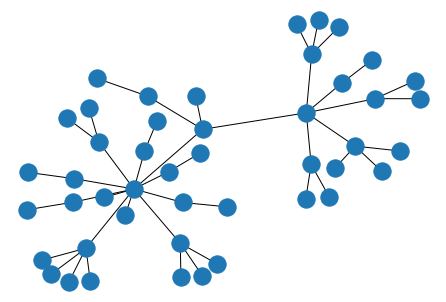

In [550]:


def nodes(k=0.8,G=nx.Graph(),start=1,counta=1):
    '''adds neighbors to 1 node'''
    node_list = []
    num_neighbours = int(np.ceil((np.log(np.random.uniform()))/(-k)))-1
    for i in range(num_neighbours):
        G.add_node(counta)
        G.add_edge(start,counta)
        node_list.append(counta)
        counta+=1         
    return node_list,G,counta

def nodes_list_neighbour(node_list,G=nx.Graph(),counta=1,k=0.8):
    new_list = []
    for j in node_list:
        for i in j:
            nodes_list_,G,counta = nodes(k=k,G=G,start=i,counta=counta)
            new_list.append(nodes_list_)
    return new_list, G, counta

G = nx.Graph()
G.add_node(0)
  
nodes_lists = [[0]]
counta = 1
k=0.2
for i in range(3):
    nodes_lists,G,counta = nodes_list_neighbour(nodes_lists,k=k,G=G,counta=counta)
    k+=0.1
    
nx.draw(G)


In [648]:
def make_matrix(n_persons,k):
    matrix = np.zeros((n_persons,n_persons))
    for i in range(n_persons):
        matrix[i,np.random.randint(0,n_persons,np.random.randint(1,int(n_persons*k)))]=1
    matrix=matrix.T+matrix
    matrix[matrix>1]=1
    for i in range(n_persons):
        matrix[i,i]=0
    return matrix

In [649]:
def draw_from_matrix(matrix,sick):
    G = nx.Graph()
    for i in range(n_persons):
        G.add_node(i)
    for row_index,i in enumerate(matrix):
        for col_index,j in enumerate(i):
            if j==1:
                G.add_edge(row_index,col_index)
    pos = nx.nx_pydot.graphviz_layout(G)
    color_map = ['red' if s == 1 else 'green' for s in sick]        
    graph = nx.draw_networkx(G,pos, node_color=color_map)
    return pos
    

In [650]:
fig = plt.figure()
A = make_matrix(n_persons)
n_persons= 10
sick = np.zeros(n_persons)
sick[1]=1
iters = 5

sick, A@sick, ((A@sick)*1/3>np.random.rand()).astype(int)

TypeError: make_matrix() missing 1 required positional argument: 'k'

<Figure size 432x288 with 0 Axes>

[1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1]
[1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


MovieWriter ffmpeg unavailable; using Pillow instead.


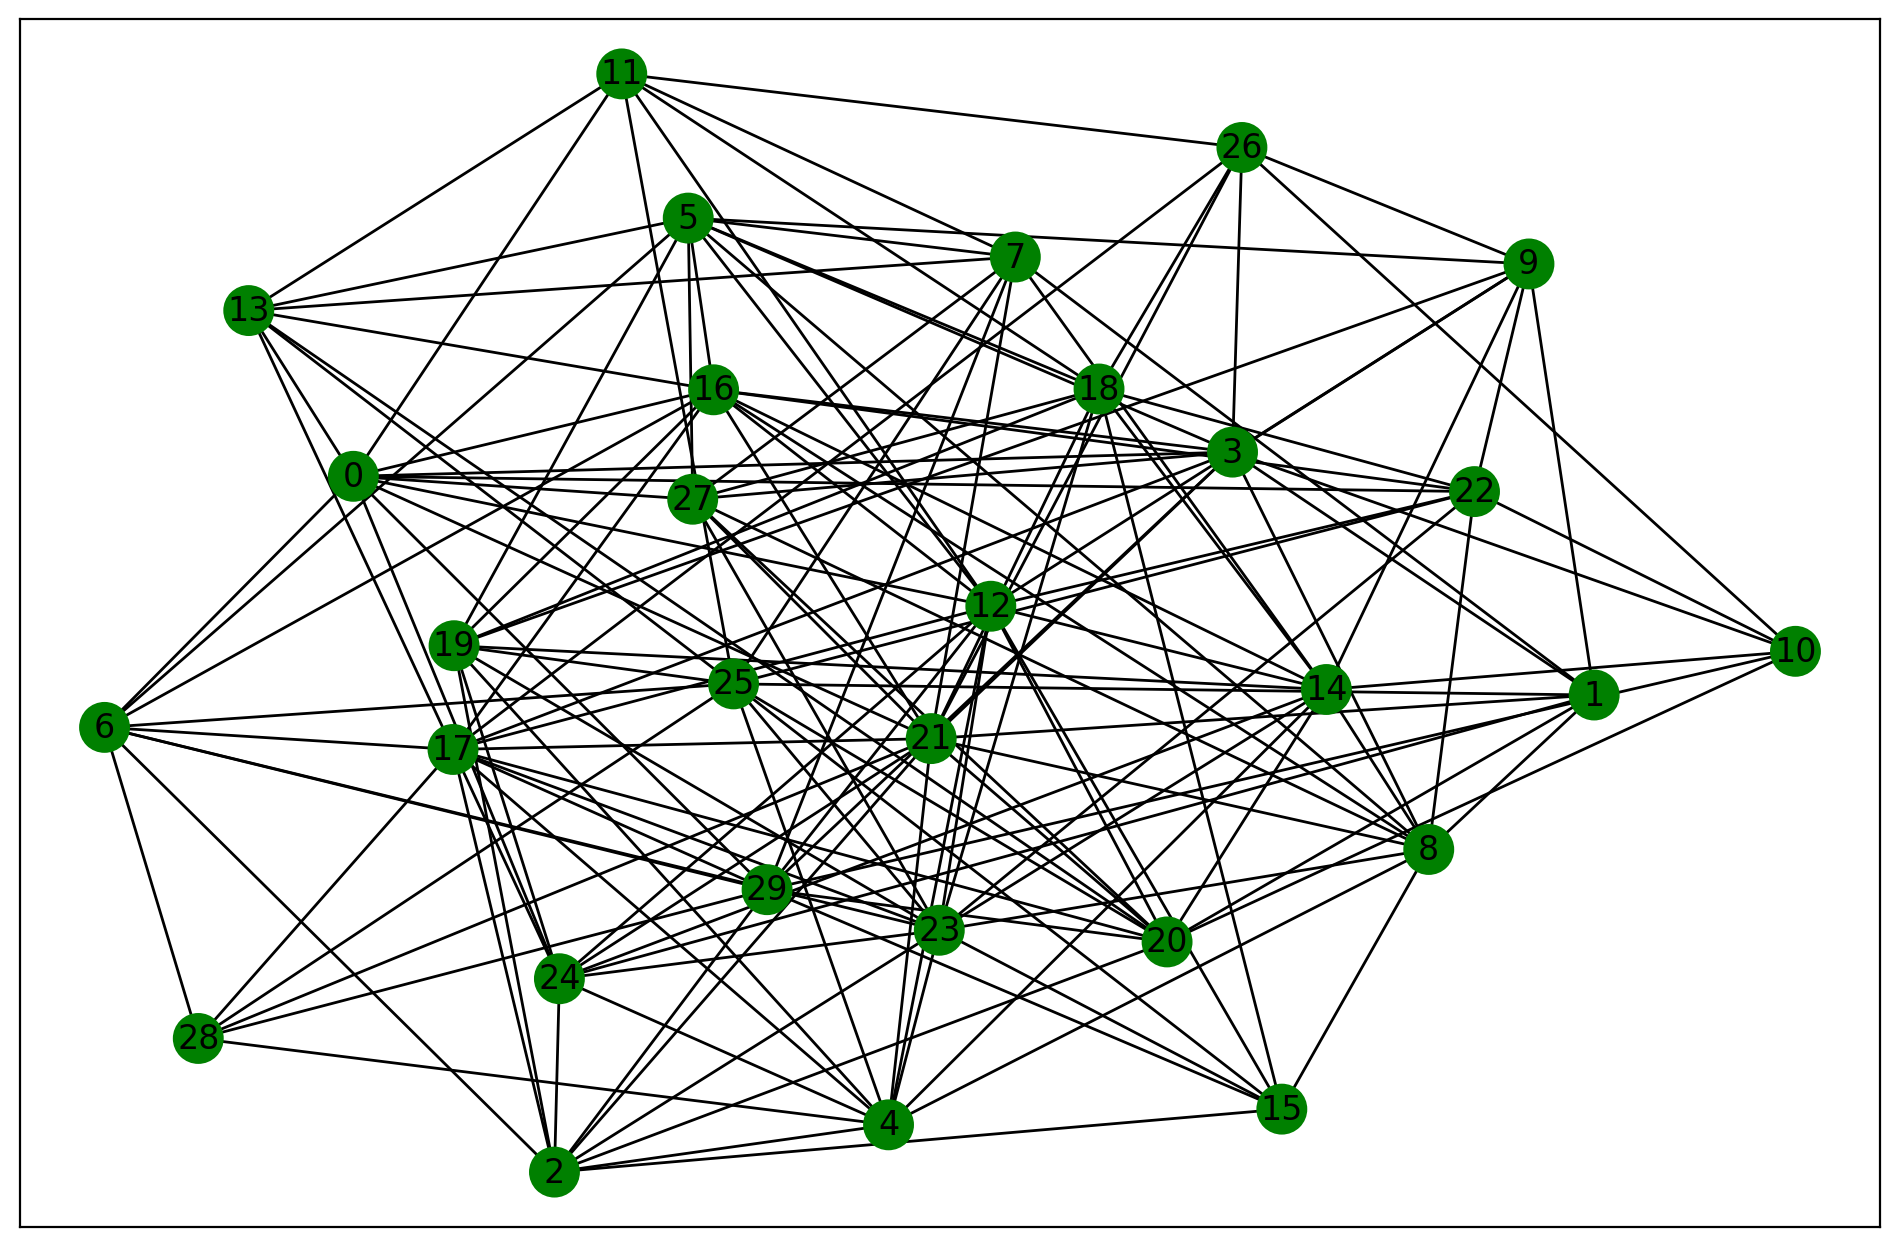

In [725]:
fig = plt.figure(figsize=(12,8),dpi=200)
n_persons= 30
A = make_matrix(n_persons,k=0.4)
sick = np.zeros(n_persons)
sick[0]=1
sick[14]=1
sick[29]=1
iters = 30
camera = Camera(fig)
draw_from_matrix(A,sick)
camera.snap()
for i in range(iters):
    sick = ((A@sick)*0.1>np.random.rand()).astype(int)
    print(sick)
    draw_from_matrix(A,sick)
    camera.snap()
    if sum(sick)==0:
        break
animation = camera.animate()
animation.save("Animation.gif",fps=3)

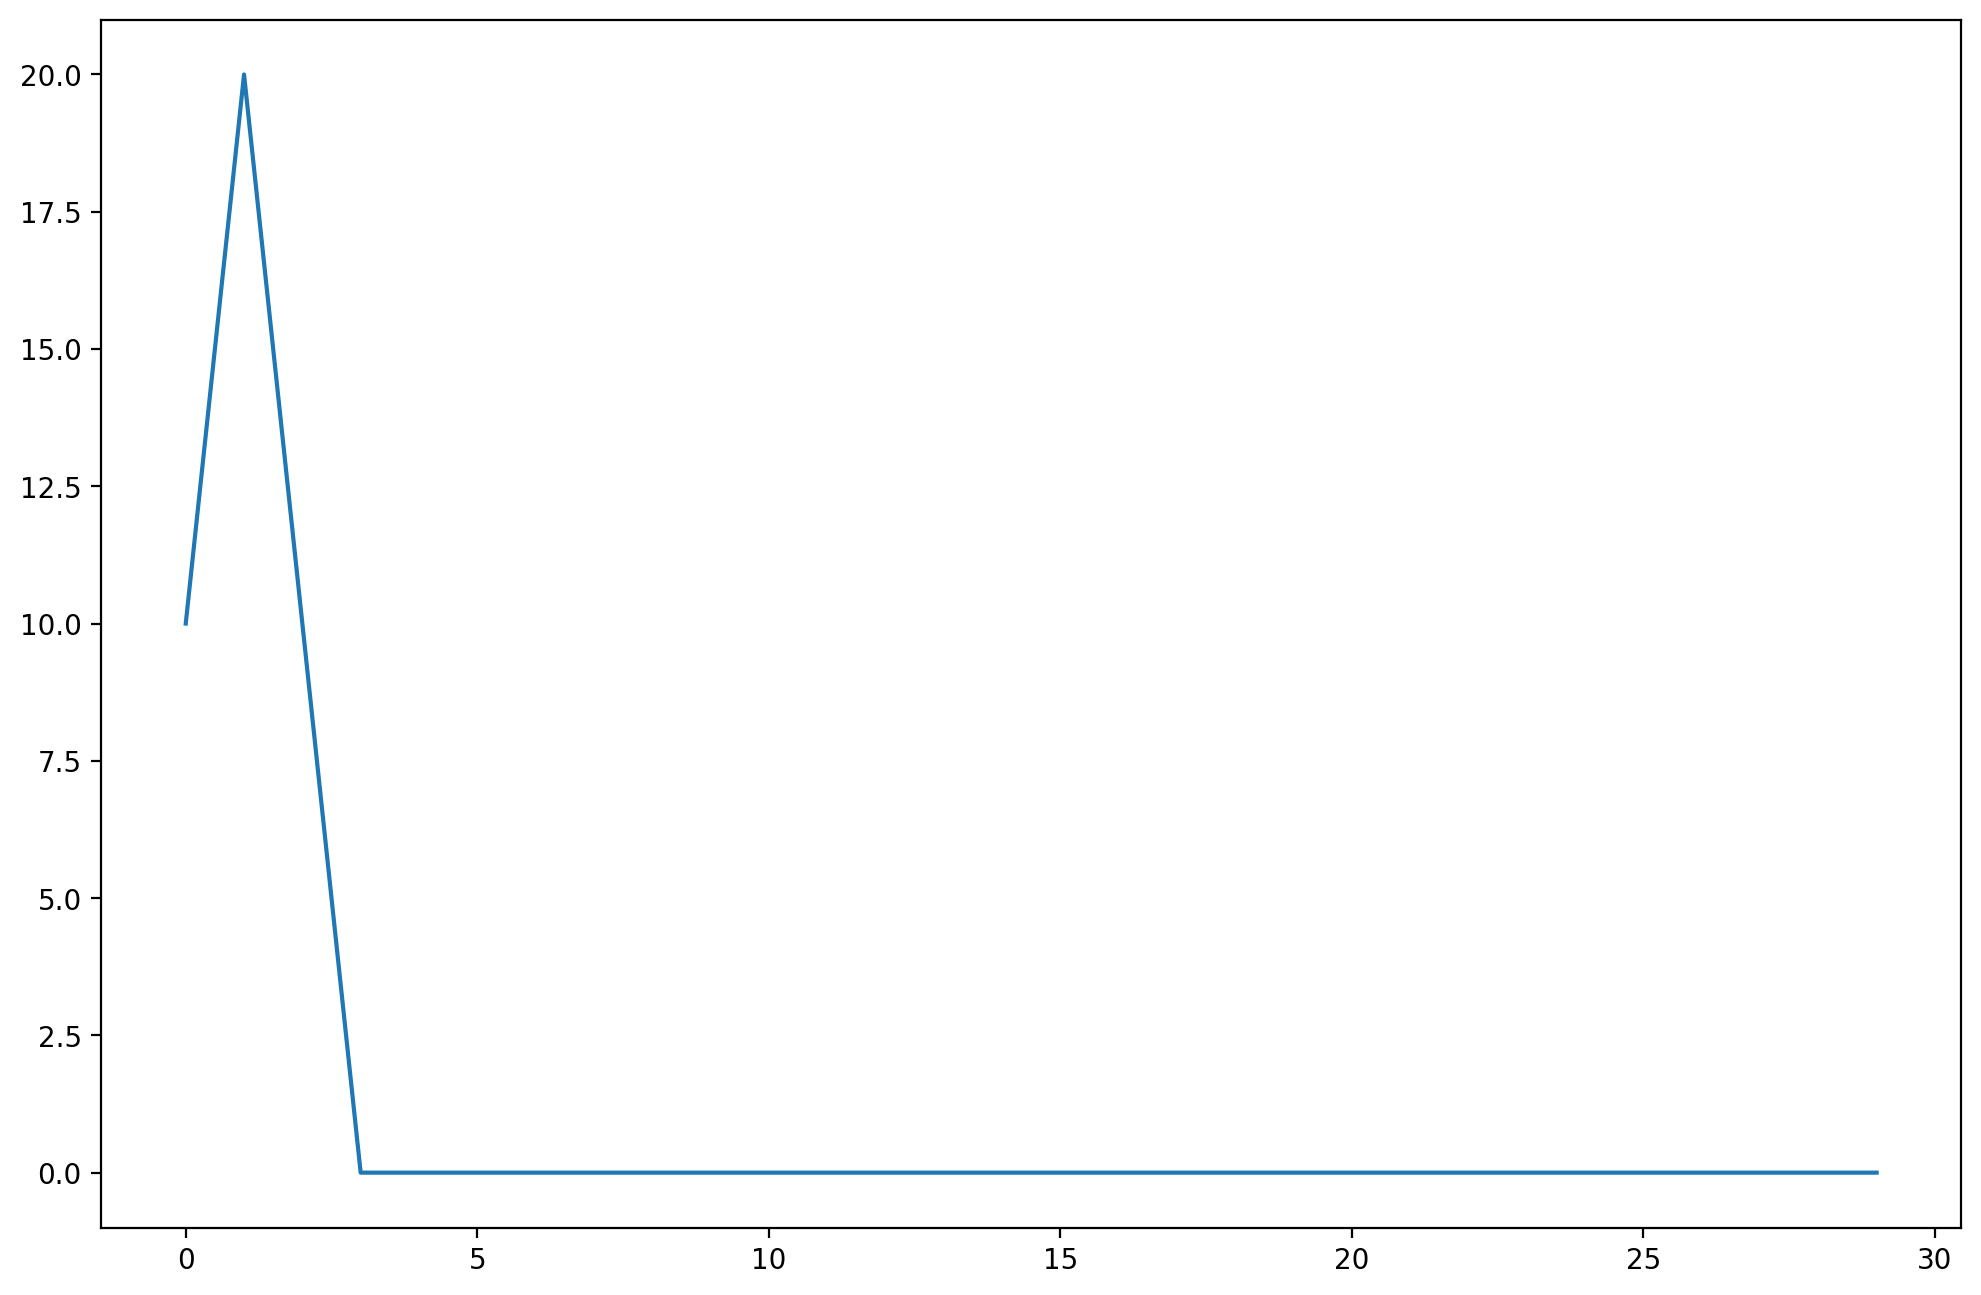

In [719]:
fig = plt.figure(figsize=(12,8),dpi=200)
n_persons= 10
A = make_matrix(n_persons,k=0.2)
sick = np.zeros(n_persons)
sick[0]=1
sick[8]=1
#sick[]=1
iters = 30
list_perc_infected = []
for i in range(iters):
    #print(i)
    #print(sick)
    sick = ((A@sick)*0.5>np.random.rand()).astype(int)
    
    #if sum(sick)==0:
        #break
    list_perc_infected.append(sum(sick)/n_persons*100)

plt.plot(range(iters),list_perc_infected)

In [597]:
sick

array([166., 149., 117., 177., 124., 138., 174., 135., 144., 164., 113.,
       101., 158., 137., 118., 122., 172., 158., 144., 157.])

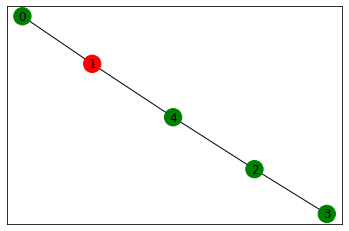

In [511]:
n_persons= 5
A = make_matrix(n_persons)
draw_from_matrix(A)

In [497]:
sick = np.zeros(n_persons)
sick[1]=1

In [498]:
sick

array([0., 1., 0., 0., 0.])

In [500]:
A @ sick

array([1., 0., 0., 0., 0.])

In [501]:
A

array([[0., 1., 1., 1., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0.]])

In [534]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.
